In [2]:
from functions.results_fun import * 

metrics = {
    'rmse' : 'rmse_compare',
    'size' : 'size',
}

print('Settings available for latest testing (version 11): ', get_settings(11))

Settings available for latest testing (version 11):  ['scsm', 'sc', 'unsmsp', 'unsm', 'unsp', 'un']


## Introduction 

#### For ease of use, the following naming convention is used for the different versions of the code: 

Prefixes are joined without spaces. Prefixes available:
- `sc` means scaled vs `un` unscaled
- `sm` means structure mutation vs nothing
- `sp` means simplify mutations vs nothing

Examples: 
- `scsm` means scaled with structure mutation
- `unsp` means unscaled with simplify mutations

Additionally, there is a version to each of the experiments, denoted with a number.
- `scsm_11` means scaled with structure mutation, version 11

## **Results**

### **Statistical significance**

I present the results for if the modifications (structure mutation and simplify) are statistically significant. If they are, then they will be represented with a `+` sign. If they are not, they will be represented with a `-` sign.

The p-values are calculated with a Wilcoxon signed-rank test, and the significance level differs with the number of signs: 
- `+` means p-value < 0.05
- `++` means p-value < 0.01
- `+++` means p-value < 0.001

________________
### **Practical significance** 

The mean and standard deviation of the results (for the modification vs control) are going to be shown. To understand better how much better/worse the modification is, the ratio between the means will be provided. 

A ratio of 0.5 means that the algorithm's RMSE/size is 50% lower than the control (which is good). 

____________________
### **Best results**

The best results for each dataset-modification pair are going to be presented. 

For example, if for dataset: `resid_build_sale_price` and for the control version/modified version, I obtained best results with `SLIM*SIG1`/`SLIM*ABS`, I will perform the comparison between these two. 

________________
### **Summary**

The results will be presented for all the experiments in the following manner:
1. Table with the results (for all the versions of each dataset-modification pair)
2. Table with the best results for each dataset
3. Table with the counts of the statistical significance and boxplot with the results' distribution 

________________
### **Experiments**

1. Does scaling matter? `sc` vs `un`
2. Does structure mutation work for unscaled data? `unsm` vs `un`
3. Does structure mutation work for scaled data? `scsm` vs `sc`
4. Does structure mutation help unscaled vs scaled data? `unsm` vs `scsm`
5. Does simplify work for unscaled data? `unsmsp` vs `unsm`
6. Does simplify work for scaled data? `scsmsp` vs `scsm`
7. How does simplify structure mutation compare for the scaled and unscaled data? `unsmsp` vs `scsmsp`



________________

### **1. Does scaling matter? `sc` vs `un`**

- Scaling the data matters to the performance of the algorithm, yielding a 40% decrease in RMSE and 30% decrease in median size.
- It is speculated that the pressure exerted for the unscaled version by the GP tree that converges too fast is the cause of this difference. 


In [30]:
means_df(prefixes=['sc_11', 'un_11'], 
         metrics=metrics, 
         table=True, 
         best=False,
         detailed=True)

╒════╤════════════════════════╤═════════════╤════════════════════╤════════════════════╤══════════════╤═════════════════════╤═════════════════╤═════════════════╤══════════════╤═════════════════════╕
│    │ Dataset                │ Algorithm   │ rmse_sc_11         │ rmse_un_11         │   ratio_rmse │ rmse_significance   │ size_sc_11      │ size_un_11      │   ratio_size │ size_significance   │
╞════╪════════════════════════╪═════════════╪════════════════════╪════════════════════╪══════════════╪═════════════════════╪═════════════════╪═════════════════╪══════════════╪═════════════════════╡
│  0 │ airfoil                │ MUL_ABS     │ 4.707 ± 1.048      │ 49.165 ± 14.124    │        0.096 │ +++                 │ 120.16 ± 11.549 │ 93.84 ± 4.301   │        1.28  │ ---                 │
├────┼────────────────────────┼─────────────┼────────────────────┼────────────────────┼──────────────┼─────────────────────┼─────────────────┼─────────────────┼──────────────┼─────────────────────┤
│  1 │ air

In [32]:
means_df(prefixes=['sc_11', 'un_11'], 
         metrics=metrics, 
         table=True, 
         best=True,
         detailed=True)

╒════════════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤════════════════════╤══════════════╤═════════════════════╤═════════════════╤═════════════════╤══════════════╤═════════════════════╕
│ Dataset                │ best_algo_sc_11   │ best_algo_un_11   │ rmse_sc_11        │ rmse_un_11         │   ratio_rmse │ rmse_significance   │ size_sc_11      │ size_un_11      │   ratio_size │ size_significance   │
╞════════════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪════════════════════╪══════════════╪═════════════════════╪═════════════════╪═════════════════╪══════════════╪═════════════════════╡
│ airfoil                │ MUL_SIG2          │ MUL_SIG1          │ 4.606 ± 0.227     │ 43.254 ± 11.86     │        0.106 │ +++                 │ 85.22 ± 5.544   │ 222.3 ± 7.22    │        0.383 │ +++                 │
├────────────────────────┼───────────────────┼───────────────────┼───────────────────┼────────────────────┼──────────────┼──────

                     All Significance Counts and Ratios                                            Best Significance Counts and Ratios                    
+----------+----------+----------+--------+----------------+--------------+    +----------+----------+---------+---------+----------------+--------------+
| Metric   | +        | -        | NSD    |   Median Ratio |   Mean Ratio |    | Metric   | +        | -       | NSD     |   Median Ratio |   Mean Ratio |
+==========+==========+==========+========+================+==============+    +==========+==========+=========+=========+================+==============+
| rmse     | 76 (84%) | 8 (8%)   | 6 (6%) |         0.6115 |     0.624933 |    | rmse     | 12 (80%) | 0 (0%)  | 3 (20%) |          0.709 |     0.653867 |
+----------+----------+----------+--------+----------------+--------------+    +----------+----------+---------+---------+----------------+--------------+
| size     | 55 (61%) | 28 (31%) | 7 (7%) |         0.769  |     1.508

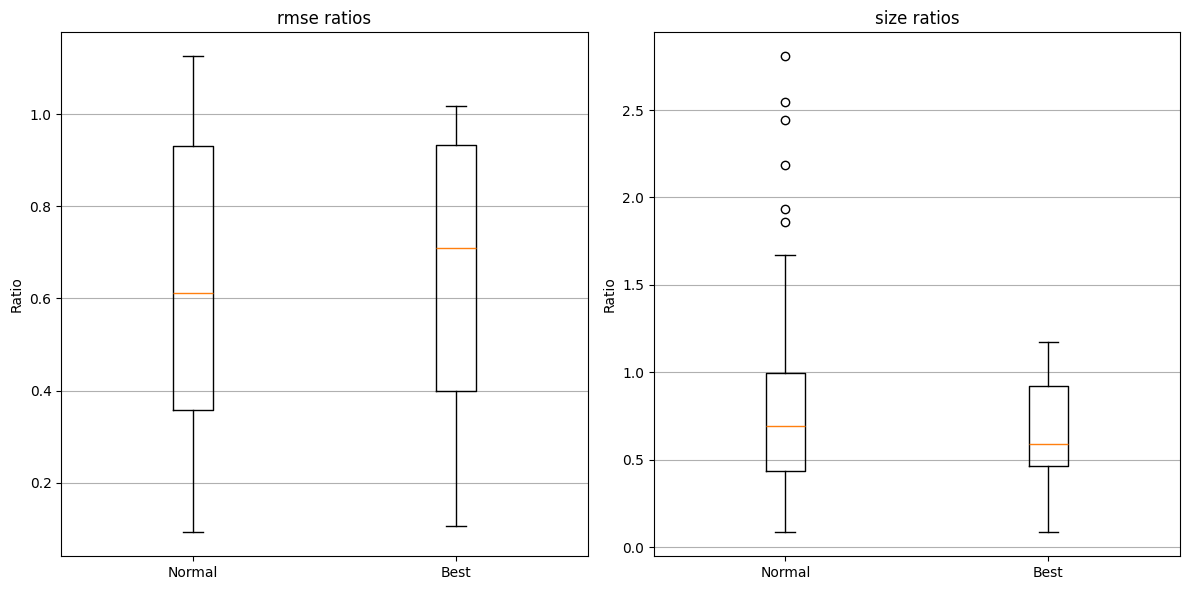

In [33]:
summary_results(prefixes=['sc_11', 'un_11'],
                metrics=metrics)

#### Comments: 
- Clearly, scaling the data matters to the performance of the algorithm.
- It is speculated that the pressure exerted for the unscaled version by the GP tree that converges too fast is the cause of this difference. 

### **2. Does structure mutation work for unscaled data? `unsm` vs `un`**

- The structure mutation is very beneficial to unscaled data, providing a 40% reduction in both mean and median RMSE.
- The pressure exerted by a fast converging GP tree is mitigated by the structure mutation, which achieves better results with smaller trees (50% the size).

In [35]:
prefixes = ['unsm_11', 'un_11']

means_df(prefixes,
         metrics=metrics, 
         table=True, 
         best=False,
         detailed=True)

╒════╤════════════════════════╤═════════════╤═══════════════════╤════════════════════╤══════════════╤═════════════════════╤═════════════════╤═════════════════╤══════════════╤═════════════════════╕
│    │ Dataset                │ Algorithm   │ rmse_unsm_11      │ rmse_un_11         │   ratio_rmse │ rmse_significance   │ size_unsm_11    │ size_un_11      │   ratio_size │ size_significance   │
╞════╪════════════════════════╪═════════════╪═══════════════════╪════════════════════╪══════════════╪═════════════════════╪═════════════════╪═════════════════╪══════════════╪═════════════════════╡
│  0 │ airfoil                │ MUL_ABS     │ 13.853 ± 9.009    │ 49.165 ± 14.124    │        0.282 │ +++                 │ 20.28 ± 1.266   │ 93.84 ± 4.301   │        0.216 │ +++                 │
├────┼────────────────────────┼─────────────┼───────────────────┼────────────────────┼──────────────┼─────────────────────┼─────────────────┼─────────────────┼──────────────┼─────────────────────┤
│  1 │ airfoil 

In [36]:
means_df(prefixes,
         metrics=metrics, 
         table=True, 
         best=True,
         detailed=True)

╒════════════════════════╤═════════════════════╤═══════════════════╤══════════════════╤════════════════════╤══════════════╤═════════════════════╤═════════════════╤═════════════════╤══════════════╤═════════════════════╕
│ Dataset                │ best_algo_unsm_11   │ best_algo_un_11   │ rmse_unsm_11     │ rmse_un_11         │   ratio_rmse │ rmse_significance   │ size_unsm_11    │ size_un_11      │   ratio_size │ size_significance   │
╞════════════════════════╪═════════════════════╪═══════════════════╪══════════════════╪════════════════════╪══════════════╪═════════════════════╪═════════════════╪═════════════════╪══════════════╪═════════════════════╡
│ bike_sharing           │ SUM_SIG1            │ MUL_SIG2          │ 0.0 ± 0.0        │ 842.24 ± 500.114   │        0.000 │ +++                 │ 9.92 ± 12.967   │ 148.36 ± 65.179 │        0.067 │ +++                 │
├────────────────────────┼─────────────────────┼───────────────────┼──────────────────┼────────────────────┼──────────────┼─

                      All Significance Counts and Ratios                                              Best Significance Counts and Ratios                     
+----------+----------+----------+----------+----------------+--------------+    +----------+----------+---------+---------+----------------+--------------+
| Metric   | +        | -        | NSD      |   Median Ratio |   Mean Ratio |    | Metric   | +        | -       | NSD     |   Median Ratio |   Mean Ratio |
+==========+==========+==========+==========+================+==============+    +==========+==========+=========+=========+================+==============+
| rmse     | 76 (84%) | 4 (4%)   | 10 (11%) |         0.617  |      0.6193  |    | rmse     | 13 (86%) | 0 (0%)  | 2 (13%) |          0.713 |     0.6448   |
+----------+----------+----------+----------+----------------+--------------+    +----------+----------+---------+---------+----------------+--------------+
| size     | 55 (61%) | 33 (36%) | 2 (2%)   |         0.

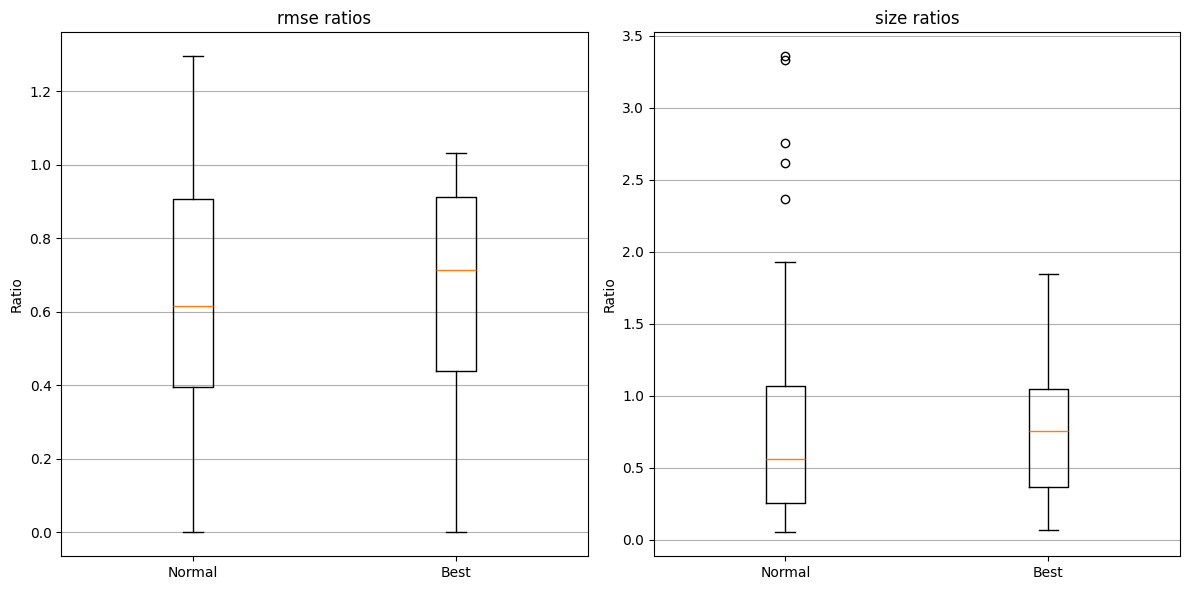

In [37]:
summary_results(prefixes,
                metrics=metrics)

### **3. Does structure mutation work for scaled data? `scsm` vs `sc`**

Structure mutation isn't good for scaled data, although it doesn't hurt the results either.

It is speculated that the structure mutation might not be working because of these reasons: 

1) With a scaled dataset, the GP tree isn't so important. The main feature of the GP tree is to make a first approximation to very distant values, so that the subsequent mutations added can finetune it. If the values are scaled, the GP tree isn't so important.

2) The admissible values for the GP tree become from [0,1], which forces the range to be very small, making the GP tree be a burden to the algorithm, because of such a high amount of unadmissible trees -> I still must test the distribution of the GP trees semantics to see if this is true.

3) Structure mutation hinders convergence because it can change very strongly individual values, which can be detrimental to the algorithm.

In [4]:
prefixes = ['scsm_11', 'sc_11']

means_df(prefixes,
         metrics=metrics, 
         table=True, 
         best=False,
         detailed=True)

╒════╤════════════════════════╤═════════════╤════════════════════╤════════════════════╤══════════════╤═════════════════════╤═════════════════╤═════════════════╤══════════════╤═════════════════════╕
│    │ Dataset                │ Algorithm   │ rmse_scsm_11       │ rmse_sc_11         │   ratio_rmse │ rmse_significance   │ size_scsm_11    │ size_sc_11      │   ratio_size │ size_significance   │
╞════╪════════════════════════╪═════════════╪════════════════════╪════════════════════╪══════════════╪═════════════════════╪═════════════════╪═════════════════╪══════════════╪═════════════════════╡
│  0 │ airfoil                │ MUL_ABS     │ 4.807 ± 0.411      │ 4.707 ± 1.048      │        1.021 │ --                  │ 31.36 ± 5.176   │ 120.16 ± 11.549 │        0.261 │ +++                 │
├────┼────────────────────────┼─────────────┼────────────────────┼────────────────────┼──────────────┼─────────────────────┼─────────────────┼─────────────────┼──────────────┼─────────────────────┤
│  1 │ air

In [39]:
means_df(prefixes,
         metrics=metrics, 
         table=True, 
         best=True,
         detailed=True)

╒════════════════════════╤═════════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤══════════════╤═════════════════════╤═════════════════╤═════════════════╤══════════════╤═════════════════════╕
│ Dataset                │ best_algo_scsm_11   │ best_algo_sc_11   │ rmse_scsm_11      │ rmse_sc_11        │   ratio_rmse │ rmse_significance   │ size_scsm_11    │ size_sc_11      │   ratio_size │ size_significance   │
╞════════════════════════╪═════════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪══════════════╪═════════════════════╪═════════════════╪═════════════════╪══════════════╪═════════════════════╡
│ bike_sharing           │ SUM_SIG1            │ SUM_SIG2          │ 110.206 ± 65.444  │ 270.74 ± 217.26   │        0.407 │ +++                 │ 84.12 ± 25.927  │ 89.44 ± 21.245  │        0.941 │ NSD                 │
├────────────────────────┼─────────────────────┼───────────────────┼───────────────────┼───────────────────┼──────────────┼─

                        All Significance Counts and Ratios                                                  Best Significance Counts and Ratios                       
+----------+----------+----------+----------+----------------+--------------+        +----------+-----+---------+---------+----------+----------------+--------------+
| Metric   | +        | -        | NSD      |   Median Ratio |   Mean Ratio |        | Metric   |   ! | +       | -       | NSD      |   Median Ratio |   Mean Ratio |
+==========+==========+==========+==========+================+==============+        +==========+=====+=========+=========+==========+================+==============+
| rmse     | 31 (34%) | 10 (11%) | 49 (54%) |          0.987 |     0.952889 |        | rmse     |   1 | 3 (21%) | 0 (0%)  | 11 (78%) |          0.992 |      0.9378  |
+----------+----------+----------+----------+----------------+--------------+        +----------+-----+---------+---------+----------+----------------+--------------

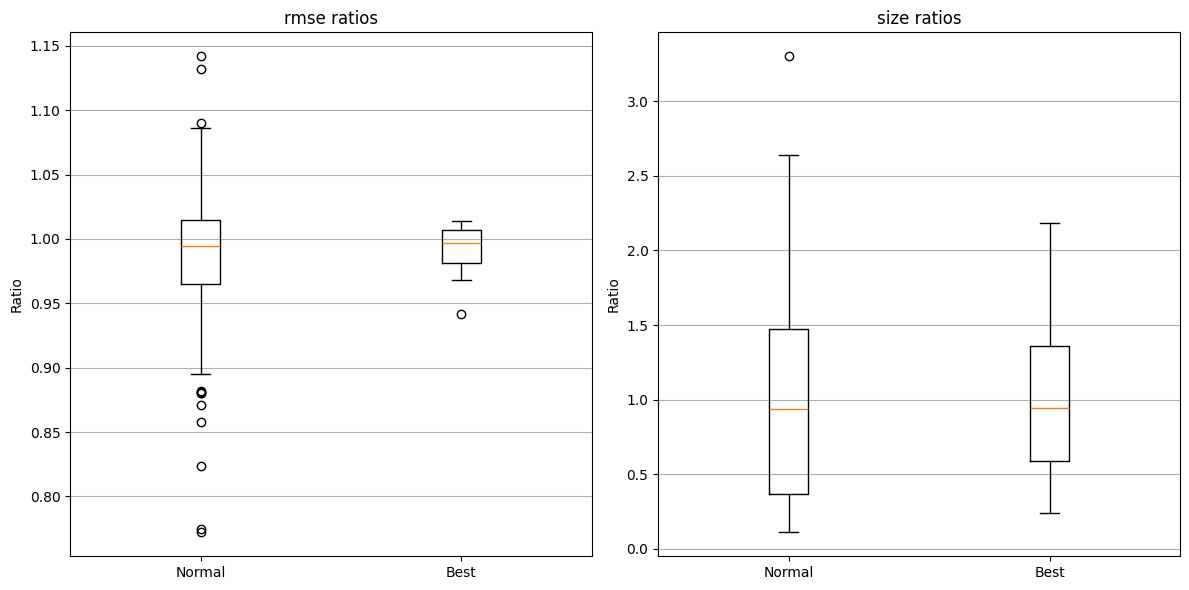

In [6]:
summary_results(prefixes,
                metrics=metrics)

### **4. Does structure mutation help unscaled vs scaled data? `unsm` vs `scsm`**

- Structure mutation is very beneficial to unscaled data, and it evens out the difference between the scaled and unscaled data.

In [41]:
prefixes = ['unsm_11', 'scsm_11']

means_df(prefixes,
         metrics=metrics, 
         table=True, 
         best=False,
         detailed=True)

╒════╤════════════════════════╤═════════════╤═══════════════════╤════════════════════╤══════════════╤═════════════════════╤═════════════════╤═════════════════╤══════════════╤═════════════════════╕
│    │ Dataset                │ Algorithm   │ rmse_unsm_11      │ rmse_scsm_11       │   ratio_rmse │ rmse_significance   │ size_unsm_11    │ size_scsm_11    │   ratio_size │ size_significance   │
╞════╪════════════════════════╪═════════════╪═══════════════════╪════════════════════╪══════════════╪═════════════════════╪═════════════════╪═════════════════╪══════════════╪═════════════════════╡
│  0 │ airfoil                │ MUL_ABS     │ 13.853 ± 9.009    │ 4.807 ± 0.411      │        2.882 │ ---                 │ 20.28 ± 1.266   │ 31.36 ± 5.176   │        0.647 │ +++                 │
├────┼────────────────────────┼─────────────┼───────────────────┼────────────────────┼──────────────┼─────────────────────┼─────────────────┼─────────────────┼──────────────┼─────────────────────┤
│  1 │ airfoil 

In [42]:
means_df(prefixes,
         metrics=metrics, 
         table=True, 
         best=True,
         detailed=True)

╒════════════════════════╤═════════════════════╤═════════════════════╤══════════════════╤═══════════════════╤══════════════╤═════════════════════╤═════════════════╤═════════════════╤══════════════╤═════════════════════╕
│ Dataset                │ best_algo_unsm_11   │ best_algo_scsm_11   │ rmse_unsm_11     │ rmse_scsm_11      │   ratio_rmse │ rmse_significance   │ size_unsm_11    │ size_scsm_11    │   ratio_size │ size_significance   │
╞════════════════════════╪═════════════════════╪═════════════════════╪══════════════════╪═══════════════════╪══════════════╪═════════════════════╪═════════════════╪═════════════════╪══════════════╪═════════════════════╡
│ bike_sharing           │ SUM_SIG1            │ SUM_SIG1            │ 0.0 ± 0.0        │ 110.206 ± 65.444  │        0.000 │ +++                 │ 9.92 ± 12.967   │ 84.12 ± 25.927  │        0.118 │ +++                 │
├────────────────────────┼─────────────────────┼─────────────────────┼──────────────────┼───────────────────┼───────────

                      All Significance Counts and Ratios                                              Best Significance Counts and Ratios                     
+----------+----------+----------+----------+----------------+--------------+    +----------+---------+---------+---------+----------------+--------------+
| Metric   | +        | -        | NSD      |   Median Ratio |   Mean Ratio |    | Metric   | +       | -       | NSD     |   Median Ratio |   Mean Ratio |
+==========+==========+==========+==========+================+==============+    +==========+=========+=========+=========+================+==============+
| rmse     | 22 (24%) | 45 (50%) | 23 (25%) |         1.029  |      1.11764 |    | rmse     | 2 (13%) | 6 (40%) | 7 (46%) |          1.027 |      1.03413 |
+----------+----------+----------+----------+----------------+--------------+    +----------+---------+---------+---------+----------------+--------------+
| size     | 40 (44%) | 46 (51%) | 4 (4%)   |         1.0575 

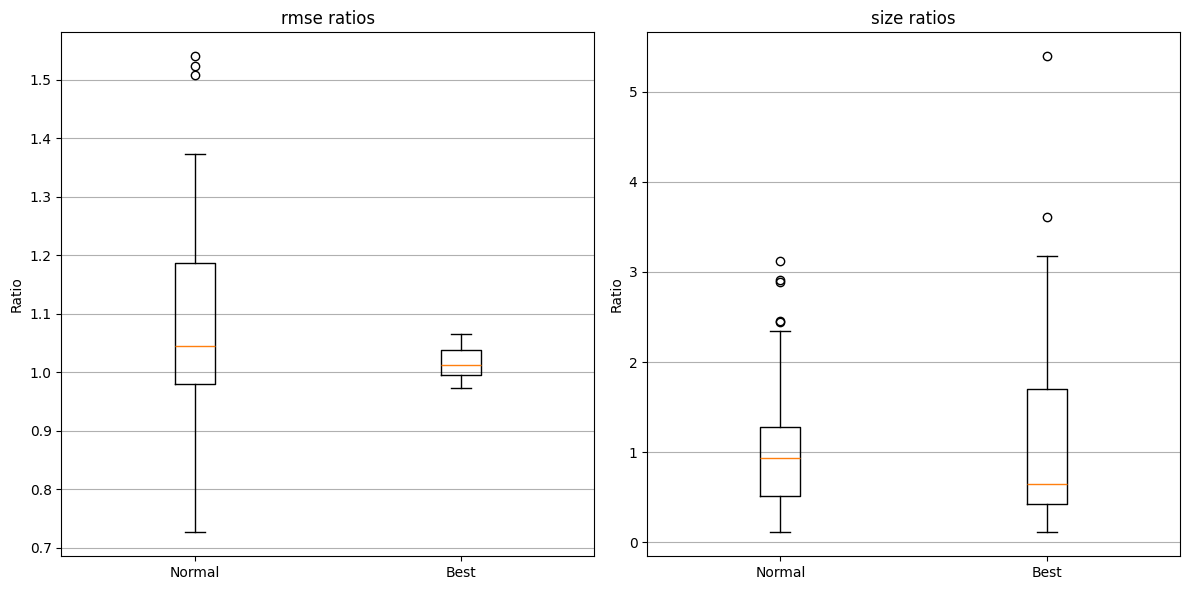

In [43]:
summary_results(prefixes,
                metrics=metrics)

### **5. Does simplify work for unscaled data? `unsmsp` vs `unsm`**

- Simplify is great for unscaled data ! 
- The RMSE stays the same, but the size halves. Add to that a 50% decrease in size from `un` to `unsm` and we get a 75% decrease in size from `un` to `unsmsp`.

In [73]:
prefixes = ['unsmsp_11', 'unsm_11']

means_df(prefixes,
         metrics=metrics, 
         table=True, 
         best=False,
         detailed=True)

╒════╤════════════════════════╤═════════════╤═══════════════════╤═══════════════════╤══════════════╤═════════════════════╤══════════════════╤═════════════════╤══════════════╤═════════════════════╕
│    │ Dataset                │ Algorithm   │ rmse_unsmsp_11    │ rmse_unsm_11      │   ratio_rmse │ rmse_significance   │ size_unsmsp_11   │ size_unsm_11    │   ratio_size │ size_significance   │
╞════╪════════════════════════╪═════════════╪═══════════════════╪═══════════════════╪══════════════╪═════════════════════╪══════════════════╪═════════════════╪══════════════╪═════════════════════╡
│  0 │ airfoil                │ MUL_ABS     │ 12.399 ± 7.936    │ 13.853 ± 9.009    │        0.895 │ NSD                 │ 20.72 ± 1.114    │ 20.28 ± 1.266   │        1.022 │ NSD                 │
├────┼────────────────────────┼─────────────┼───────────────────┼───────────────────┼──────────────┼─────────────────────┼──────────────────┼─────────────────┼──────────────┼─────────────────────┤
│  1 │ airfoil 

In [74]:
means_df(prefixes,
         metrics=metrics, 
         table=True, 
         best=True,
         detailed=True)

╒════════════════════════╤═══════════════════════╤═════════════════════╤═══════════════════╤══════════════════╤══════════════╤═════════════════════╤══════════════════╤═════════════════╤══════════════╤═════════════════════╕
│ Dataset                │ best_algo_unsmsp_11   │ best_algo_unsm_11   │ rmse_unsmsp_11    │ rmse_unsm_11     │   ratio_rmse │ rmse_significance   │ size_unsmsp_11   │ size_unsm_11    │   ratio_size │ size_significance   │
╞════════════════════════╪═══════════════════════╪═════════════════════╪═══════════════════╪══════════════════╪══════════════╪═════════════════════╪══════════════════╪═════════════════╪══════════════╪═════════════════════╡
│ bike_sharing           │ SUM_ABS               │ SUM_SIG1            │ 0.0 ± 0.0         │ 0.0 ± 0.0        │        0.000 │ NSD                 │ 4.28 ± 1.866     │ 9.92 ± 12.967   │        0.431 │ +++                 │
├────────────────────────┼───────────────────────┼─────────────────────┼───────────────────┼────────────────

                      All Significance Counts and Ratios                                              Best Significance Counts and Ratios                     
+----------+----------+----------+----------+----------------+--------------+    +----------+----------+---------+----------+----------------+--------------+
| Metric   | +        | -        | NSD      |   Median Ratio |   Mean Ratio |    | Metric   | +        | -       | NSD      |   Median Ratio |   Mean Ratio |
+==========+==========+==========+==========+================+==============+    +==========+==========+=========+==========+================+==============+
| rmse     | 19 (21%) | 29 (32%) | 42 (46%) |         1.001  |     1.00784  |    | rmse     | 0 (0%)   | 3 (20%) | 12 (80%) |          1     |     0.954867 |
+----------+----------+----------+----------+----------------+--------------+    +----------+----------+---------+----------+----------------+--------------+
| size     | 65 (72%) | 14 (15%) | 11 (12%) |      

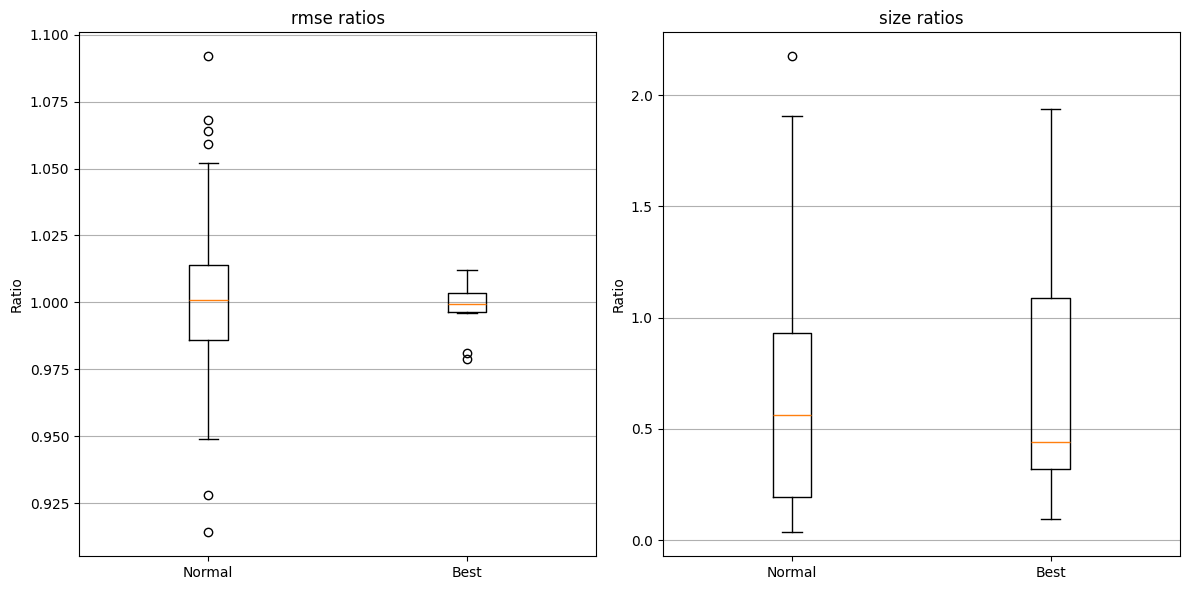

In [75]:
summary_results(prefixes,
                metrics=metrics)

### **6. Does simplify work for scaled data? `scsmsp` vs `scsm`**

- Only ever so slightly. It is hypothetized that the scaled data doesn't benefit as much from the simplify mutation because the scaled version is less prone to overfitting, and the simplify mutation is a way to prevent overfitting (after convergence).


In [69]:
prefixes = ['scsmsp_8', 'scsm_8']

means_df(prefixes,
         metrics=metrics, 
         table=True, 
         best=False,
         detailed=True)

╒════╤════════════════════════╤═════════════╤══════════════════════╤══════════════════════╤══════════════╤═════════════════════╤═════════════════╤═════════════════╤══════════════╤═════════════════════╕
│    │ Dataset                │ Algorithm   │ rmse_scsmsp_8        │ rmse_scsm_8          │   ratio_rmse │ rmse_significance   │ size_scsmsp_8   │ size_scsm_8     │   ratio_size │ size_significance   │
╞════╪════════════════════════╪═════════════╪══════════════════════╪══════════════════════╪══════════════╪═════════════════════╪═════════════════╪═════════════════╪══════════════╪═════════════════════╡
│  0 │ airfoil                │ MUL_ABS     │ 4.802 ± 0.348        │ 4.471 ± 0.191        │        1.074 │ ---                 │ 142.31 ± 47.621 │ 288.22 ± 34.643 │        0.494 │ +++                 │
├────┼────────────────────────┼─────────────┼──────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────────────┼─────────────────┼──────────────┼─────────────

In [72]:
prefixes = ['scsmsp_8', 'scsm_8']

means_df(prefixes,
         metrics=metrics, 
         table=True, 
         best=True,
         detailed=True)

╒════════════════════════╤══════════════════════╤════════════════════╤═══════════════════╤════════════════════╤══════════════╤═════════════════════╤═════════════════╤═════════════════╤══════════════╤═════════════════════╕
│ Dataset                │ best_algo_scsmsp_8   │ best_algo_scsm_8   │ rmse_scsmsp_8     │ rmse_scsm_8        │   ratio_rmse │ rmse_significance   │ size_scsmsp_8   │ size_scsm_8     │   ratio_size │ size_significance   │
╞════════════════════════╪══════════════════════╪════════════════════╪═══════════════════╪════════════════════╪══════════════╪═════════════════════╪═════════════════╪═════════════════╪══════════════╪═════════════════════╡
│ bike_sharing           │ MUL_SIG2             │ MUL_SIG1           │ 113.506 ± 94.413  │ 132.92 ± 98.909    │        0.854 │ NSD                 │ 81.15 ± 18.332  │ 129.65 ± 53.417 │        0.626 │ +++                 │
├────────────────────────┼──────────────────────┼────────────────────┼───────────────────┼────────────────────┼─

                      All Significance Counts and Ratios                                              Best Significance Counts and Ratios                     
+----------+----------+----------+----------+----------------+--------------+    +----------+----------+---------+----------+----------------+--------------+
| Metric   | +        | -        | NSD      |   Median Ratio |   Mean Ratio |    | Metric   | +        | -       | NSD      |   Median Ratio |   Mean Ratio |
+==========+==========+==========+==========+================+==============+    +==========+==========+=========+==========+================+==============+
| rmse     | 17 (18%) | 19 (21%) | 54 (60%) |         1.0035 |     1.02398  |    | rmse     | 2 (13%)  | 3 (20%) | 10 (66%) |          1.013 |     0.998733 |
+----------+----------+----------+----------+----------------+--------------+    +----------+----------+---------+----------+----------------+--------------+
| size     | 55 (61%) | 23 (25%) | 12 (13%) |      

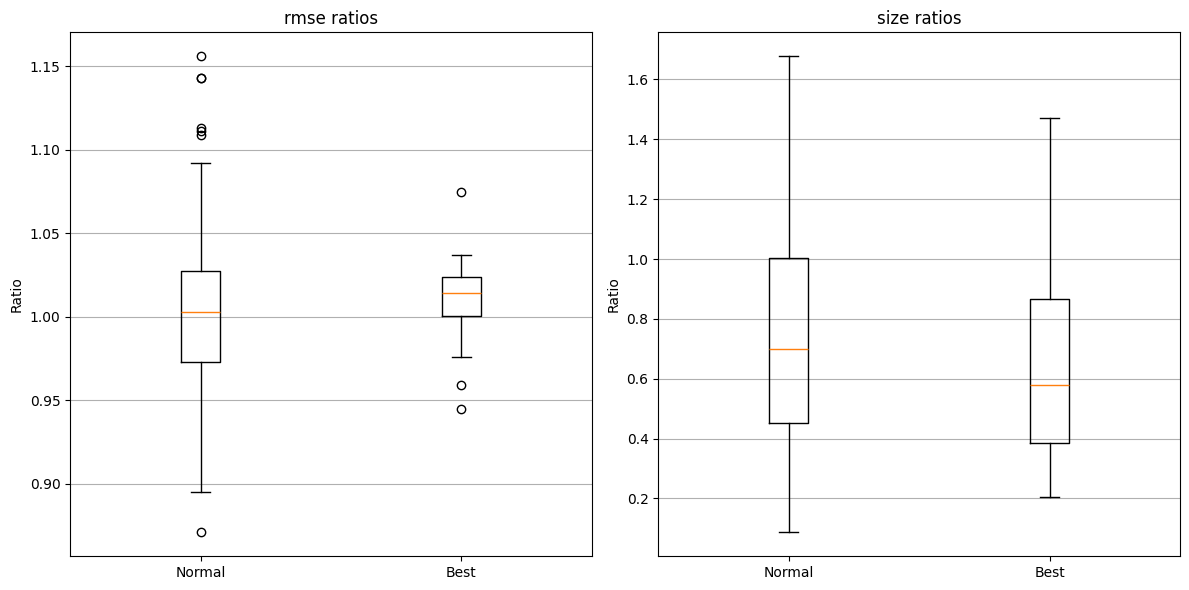

In [70]:
summary_results(prefixes,
                metrics=metrics)

### **7. How does simplify structure mutation compare for the scaled and unscaled data? `unsmsp` vs `scsmsp`**

Simplify is very benefitial to unscaled data. It more than halves the size of the tree compared to the scaled version, while maintaining the RMSE performance.

In [61]:
prefixes=['unsmsp_11', 'scsmsp_8']

means_df(prefixes,
         metrics=metrics, 
         table=True, 
         best=False,
         detailed=True)

╒════╤════════════════════════╤═════════════╤═══════════════════╤══════════════════════╤══════════════╤═════════════════════╤══════════════════╤═════════════════╤══════════════╤═════════════════════╕
│    │ Dataset                │ Algorithm   │ rmse_unsmsp_11    │ rmse_scsmsp_8        │   ratio_rmse │ rmse_significance   │ size_unsmsp_11   │ size_scsmsp_8   │   ratio_size │ size_significance   │
╞════╪════════════════════════╪═════════════╪═══════════════════╪══════════════════════╪══════════════╪═════════════════════╪══════════════════╪═════════════════╪══════════════╪═════════════════════╡
│  0 │ airfoil                │ MUL_ABS     │ 12.399 ± 7.936    │ 4.802 ± 0.348        │        2.582 │ ---                 │ 20.72 ± 1.114    │ 142.31 ± 47.621 │        0.146 │ +++                 │
├────┼────────────────────────┼─────────────┼───────────────────┼──────────────────────┼──────────────┼─────────────────────┼──────────────────┼─────────────────┼──────────────┼─────────────────────┤


In [62]:
means_df(prefixes,
         metrics=metrics, 
         table=True, 
         best=True,
         detailed=True)

╒════════════════════════╤═══════════════════════╤══════════════════════╤═══════════════════╤═══════════════════╤══════════════╤═════════════════════╤══════════════════╤═════════════════╤══════════════╤═════════════════════╕
│ Dataset                │ best_algo_unsmsp_11   │ best_algo_scsmsp_8   │ rmse_unsmsp_11    │ rmse_scsmsp_8     │   ratio_rmse │ rmse_significance   │ size_unsmsp_11   │ size_scsmsp_8   │   ratio_size │ size_significance   │
╞════════════════════════╪═══════════════════════╪══════════════════════╪═══════════════════╪═══════════════════╪══════════════╪═════════════════════╪══════════════════╪═════════════════╪══════════════╪═════════════════════╡
│ bike_sharing           │ SUM_ABS               │ MUL_SIG2             │ 0.0 ± 0.0         │ 113.506 ± 94.413  │        0.000 │ +++                 │ 4.28 ± 1.866     │ 81.15 ± 18.332  │        0.053 │ +++                 │
├────────────────────────┼───────────────────────┼──────────────────────┼───────────────────┼───────

                      All Significance Counts and Ratios                                              Best Significance Counts and Ratios                     
+----------+----------+----------+----------+----------------+--------------+    +----------+---------+---------+---------+----------------+--------------+
| Metric   | +        | -        | NSD      |   Median Ratio |   Mean Ratio |    | Metric   | +       | -       | NSD     |   Median Ratio |   Mean Ratio |
+==========+==========+==========+==========+================+==============+    +==========+=========+=========+=========+================+==============+
| rmse     | 29 (32%) | 37 (41%) | 24 (26%) |         0.9965 |     1.10192  |    | rmse     | 6 (40%) | 6 (40%) | 3 (20%) |          0.986 |     1.043    |
+----------+----------+----------+----------+----------------+--------------+    +----------+---------+---------+---------+----------------+--------------+
| size     | 66 (73%) | 15 (16%) | 9 (10%)  |         0.3705 

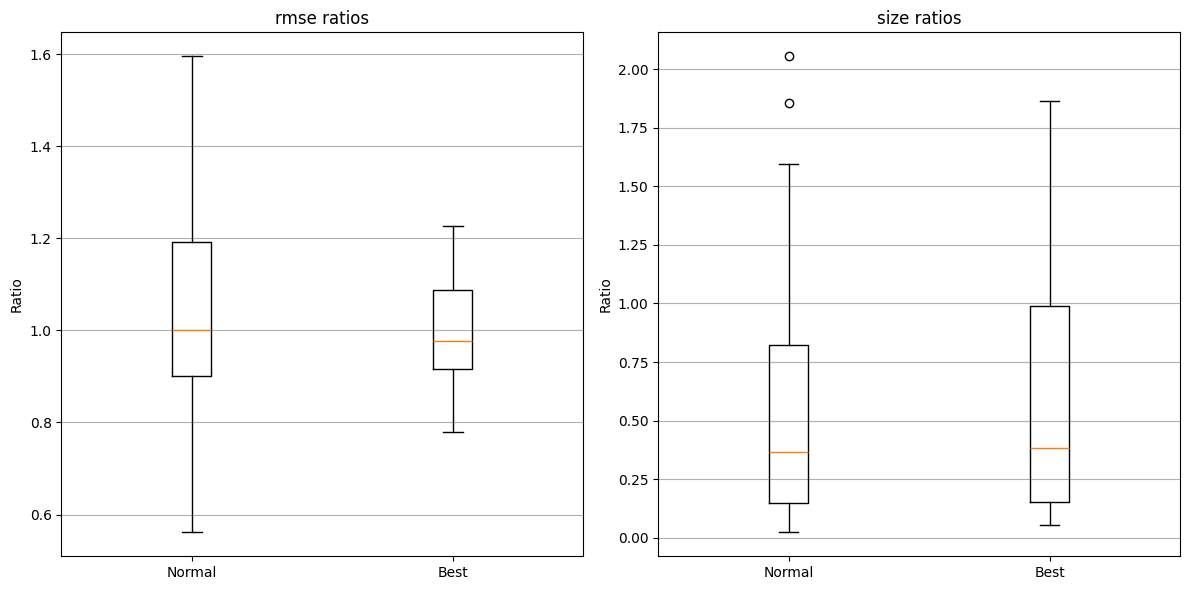

In [63]:
summary_results(prefixes,
                metrics=metrics)